In [1]:
import pandas as pd
import json
import requests
from bs4 import BeautifulSoup

In [2]:
response = requests.get(
    'https://www.sofascore.com/manchester-united-tottenham-hotspur/IsK#id:11352407,tab:statistics',
    headers={
         'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36'
    }
)

In [3]:
response.status_code

200

In [4]:
soup = BeautifulSoup(response.text, 'html.parser')

In [5]:
soup.select('g[cursor="pointer"]')

[]

In [6]:
import requests


headers = {
    'authority': 'api.sofascore.com',
    'accept': '*/*',
    'accept-language': 'en-GB,en-US;q=0.9,en;q=0.8',
    'cache-control': 'max-age=0',
    'if-none-match': 'W/"932bdb64a5"',
    'origin': 'https://www.sofascore.com',
    'referer': 'https://www.sofascore.com/',
    'sec-ch-ua': '"Not_A Brand";v="8", "Chromium";v="120", "Google Chrome";v="120"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-site',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36',
}

response = requests.get('https://api.sofascore.com/api/v1/event/11352407/shotmap', headers=headers)

In [7]:
response.status_code

200

In [8]:
headers['if-Modified-Since'] = 'Sun, 7 Jan 2024 00:00:00 EST'

In [9]:
response = requests.get('https://api.sofascore.com/api/v1/event/11352407/shotmap', headers=headers)

In [10]:
response.status_code

200

In [11]:
shots = response.json()

In [12]:
shots

{'shotmap': [{'player': {'name': 'Bruno Fernandes',
    'slug': 'bruno-fernandes',
    'shortName': 'B. Fernandes',
    'position': 'M',
    'jerseyNumber': '8',
    'userCount': 98559,
    'id': 288205,
    'fieldTranslations': {'nameTranslation': {'ar': 'برونو فيرنانديس'},
     'shortNameTranslation': {'ar': 'ب. فيرنانديس'}}},
   'isHome': False,
   'shotType': 'miss',
   'situation': 'free-kick',
   'playerCoordinates': {'x': 30.197273238078516, 'y': 47, 'z': 0},
   'bodyPart': 'right-foot',
   'goalMouthLocation': 'close-high',
   'goalMouthCoordinates': {'x': 0, 'y': 73.24374410757775, 'z': 56.9},
   'xg': 0.13315658271313,
   'id': 2153766,
   'time': 95,
   'addedTime': 9,
   'timeSeconds': 5915,
   'draw': {'start': {'x': 47, 'y': 13.374625938803113},
    'end': {'x': 24.157015243583416, 'y': 0},
    'goal': {'x': 40.40766366981866, 'y': 76.68026413911397}},
   'reversedPeriodTime': 1,
   'reversedPeriodTimeSeconds': 385,
   'incidentType': 'shot'},
  {'player': {'name': 'Casem

In [21]:
# Extracting the 'shotmap' data
shotmap_data = shots['shotmap']

# Converting to DataFrame
df = pd.DataFrame(shotmap_data)

# Displaying the DataFrame
print(df)

                                               player  isHome shotType  \
0   {'name': 'Bruno Fernandes', 'slug': 'bruno-fer...   False     miss   
1   {'name': 'Casemiro', 'firstName': '', 'lastNam...   False    block   
2   {'name': 'Casemiro', 'firstName': '', 'lastNam...    True    block   
3   {'name': 'Ben Davies', 'slug': 'ben-davies', '...   False    block   
4   {'name': 'James Maddison', 'slug': 'james-madd...   False    block   
5   {'name': 'Bruno Fernandes', 'slug': 'bruno-fer...   False     save   
6   {'name': 'Bruno Fernandes', 'slug': 'bruno-fer...   False    block   
7   {'name': 'Lisandro Martínez', 'firstName': '',...    True     goal   
8   {'name': 'Ben Davies', 'slug': 'ben-davies', '...    True     miss   
9   {'name': 'Casemiro', 'firstName': '', 'lastNam...    True     save   
10  {'name': 'Pape Matar Sarr', 'firstName': '', '...    True     miss   
11  {'name': 'Yves Bissouma', 'slug': 'yves-bissou...   False     miss   
12  {'name': 'Heung-min Son', 'firstNa

In [41]:
selected_columns = [
    {'Player': item['player']['name'],
     'Outcome': item['shotType'],
     'Coordinates X': item['playerCoordinates']['x'],
     'Coordinates Y': item['playerCoordinates']['y'],
     'Team_id': item['id'],
     #'xg': item['xg'],
     'Shot Location': item['goalMouthLocation']}
    for item in shotmap_data if item.get('isHome', True)  
]

df = pd.DataFrame(selected_columns)
print(df)

                Player Outcome  Coordinates X  Coordinates Y  Team_id  \
0             Casemiro   block       4.303754      34.891368  2153748   
1    Lisandro Martínez    goal       3.154056      91.166682  2153647   
2           Ben Davies    miss       5.693406      39.552930  2153717   
3             Casemiro    save      20.033115      34.397020  2153612   
4      Pape Matar Sarr    miss       5.170023      38.811071  2153575   
5             Casemiro    save       0.835204      26.457956  2153497   
6       James Maddison    save       8.000000      33.000000  2153483   
7      Pape Matar Sarr    goal       3.405421      60.061401  2153453   
8     Dejan Kulusevski    save      20.256575      74.000000  2153290   
9               Antony    miss       0.371366      34.329386  2153229   
10     Pape Matar Sarr   block       4.000000      37.902733  2153219   
11    Dejan Kulusevski    save      12.796164      49.924433  2153190   
12     Pape Matar Sarr    miss       7.000000      

In [31]:
#Shotmap
import matplotlib.pyplot as plt

from mplsoccer import Pitch 

Text(0.5, 1.0, 'Manchester United vs Tottenham shots - 2023')

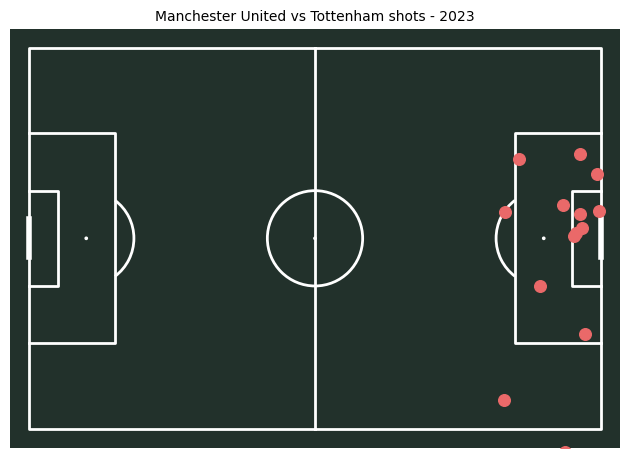

In [36]:
pitch = Pitch(pitch_color='#22312b', line_color='white')
fig, ax = pitch.draw()

plt.gca().invert_xaxis()
plt.scatter(df['Coordinates X'], df['Coordinates Y'], df[''], c="#ea6969",s=70,alpha=1)

plt.title("Tottenham Shots vs Manchester United - 2023", fontsize=10)